## Covid Impact Assessment

### ADS 507 Team 3 - Final Team Project

Halee Stags, Nishok Narayanan, Vicky van der Wagt


Github repository link: https://github.com/HNStaggs/ADS507_GroupProject.git

---------------

Load Libraries and Functions

In [5]:
import pandas as pd
import numpy as np
import pymysql as mysql
import mysql.connector
import warnings
import matplotlib.pyplot as plt
import csv
import pyodbc
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import event
from tabulate import tabulate
import plotly.express as px
import seaborn as sns


# mysql password
PASSWORD = "password"

## Preprocessing
1. Import/connect to dataframes
2. Explore/examine dataframes
3. Clean/pre-process for upload to covid_db

### 1. Import/connect to dataframes

In [6]:
learn = pd.read_csv("datasets/learning_loss_covid_database.csv")
demos = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/demographics.csv"
)
epi = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv"
)
health = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/health.csv")
vacc = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/vaccinations.csv"
)
gdp = pd.read_csv("datasets/GDPForecast_DL02252024.csv")
regions = pd.read_csv("regions.csv")

### 2. Explore/examine dataframes

Examine DataFrames Info: Shape, Datatypes, and Missing Values

In [7]:
learn.info()
demos.info()
epi.info()
health.info()
vacc.info()
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      41 non-null     object 
 1   loss         41 non-null     float64
 2   weeks        41 non-null     int64  
 3   deaths       41 non-null     float64
 4   gdp          41 non-null     float64
 5   private      41 non-null     float64
 6   internet     41 non-null     int64  
 7   hlo          41 non-null     float64
 8   vac          41 non-null     float64
 9   stringency   41 non-null     float64
 10  union        41 non-null     float64
 11  polity       41 non-null     int64  
 12  loggdp       41 non-null     float64
 13  logweeks     39 non-null     float64
 14  weeks2       41 non-null     int64  
 15  pop          41 non-null     int64  
 16  schooling    41 non-null     float64
 17  wbcode       41 non-null     object 
 18  region_code  41 non-null     object 
 19  hlo25     

**View Dataframes and Make Note of Redundant Variables within Datasets and Between Datasets**

In [8]:
# Redundant information: deaths, gdp, vac, loggdp, logweeks, weeks2, pop, hlo25, covid25
# Update column 1 name to "country_name"
learn.head()

,country,loss,weeks,deaths,gdp,private,internet,hlo,vac,stringency,...,weeks2,pop,schooling,wbcode,region_code,hlo25,oecd,covid,high,covid25
0,Argentina,0.44,39,288.00,8585.69,26.08010,86,457.418,65.0681,67.0396,...,1521,45000000,9.51,ARG,Latin America and the Caribbean,18.2967,0,413.418,0,16.5367
1,Australia,0.01,8,60.37,51680.30,29.53870,90,544.360,64.0000,61.0000,...,64,26000000,11.54,AUS,Advanced Economies,21.7744,1,543.360,1,21.7344
2,Bangladesh,0.28,63,17.84,2270.35,23.90350,25,340.088,17.0000,70.0000,...,3969,170000000,5.91,BGD,South Asia,13.6035,0,312.088,0,12.4835
3,Belgium,0.23,9,284.67,45189.40,54.17840,92,340.088,87.0000,50.0000,...,81,11000000,10.69,BEL,Advanced Economies,13.6035,1,317.088,1,12.6835
4,Botswana,0.29,11,118.60,6348.83,6.93809,64,417.656,12.0000,50.0000,...,121,2300000,9.55,BWA,Sub-Saharan Africa,16.7062,0,388.656,0,15.5462


In [9]:
# Redundant information: Shows total country data, and then breaks down some countries by region or province. Need to reduce to whole country data only.
demos.head()

,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,AF_BAL,1509183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF_BAM,495557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Needs to be reduced down to largest cummulative total for each country
epi.head()

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [11]:
# Need to reduce down to cummulative country totals only. Some have additional region information.
health.head()

,location_key,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd
0,AD,NaN,33.5,7.7,2.7,NaN,NaN,NaN,NaN,NaN,4.0128,3.3333,4040.786621,1688.121460
1,AE,77.814,28.9,16.3,6.5,69.555,44.863,54.7,16.8,NaN,5.7271,2.5278,1357.017456,256.034485
2,AF,64.486,NaN,9.2,47.9,237.554,192.532,211.1,29.8,0.5,0.1755,0.2782,67.122650,50.665913
3,AG,76.885,NaN,13.1,5.0,126.917,83.136,29.9,22.6,NaN,4.5171,2.9560,673.859680,235.749039
4,AL,78.900,28.7,9.0,7.8,93.315,49.486,68.0,17.0,NaN,3.6495,1.2164,NaN,NaN


In [12]:
# Times series data needs to be reduced to maximum cummulative numbers.
vacc.head()

,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2021-01-25,AD,NaN,576.0,NaN,NaN,NaN,576.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01,AD,460.0,1036.0,NaN,NaN,460.0,1036.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-10,AD,255.0,1291.0,NaN,NaN,255.0,1291.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-12,AD,331.0,1622.0,NaN,NaN,331.0,1622.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-19,AD,519.0,2141.0,NaN,NaN,519.0,2141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Needs to be trimmed to years of pandemic and forecast only
# Need to update Column 1 name to "country_name"
gdp.head()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,-2.4,-20.7,no data,no data,no data,no data,no data,no data,no data
1,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,2.1,-3.3,8.9,4.8,3.6,3.3,3.4,3.5,3.5,3.5
2,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1,-5.1,3.4,3.2,3.8,3.1,2.5,1.9,1.7,1.7
3,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,-11.2,8.3,8.8,2.1,1.5,1.5,1.5,1.5,1.5
4,Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,...,-0.7,-5.6,1.2,3,1.3,3.3,3.4,3.5,3.5,3.6


In [14]:
learn.head()

,country,loss,weeks,deaths,gdp,private,internet,hlo,vac,stringency,...,weeks2,pop,schooling,wbcode,region_code,hlo25,oecd,covid,high,covid25
0,Argentina,0.44,39,288.00,8585.69,26.08010,86,457.418,65.0681,67.0396,...,1521,45000000,9.51,ARG,Latin America and the Caribbean,18.2967,0,413.418,0,16.5367
1,Australia,0.01,8,60.37,51680.30,29.53870,90,544.360,64.0000,61.0000,...,64,26000000,11.54,AUS,Advanced Economies,21.7744,1,543.360,1,21.7344
2,Bangladesh,0.28,63,17.84,2270.35,23.90350,25,340.088,17.0000,70.0000,...,3969,170000000,5.91,BGD,South Asia,13.6035,0,312.088,0,12.4835
3,Belgium,0.23,9,284.67,45189.40,54.17840,92,340.088,87.0000,50.0000,...,81,11000000,10.69,BEL,Advanced Economies,13.6035,1,317.088,1,12.6835
4,Botswana,0.29,11,118.60,6348.83,6.93809,64,417.656,12.0000,50.0000,...,121,2300000,9.55,BWA,Sub-Saharan Africa,16.7062,0,388.656,0,15.5462


### 3. Clean/Pre-Process Data for upload to covid_db

**Regions Data Preprocessing**

* Select necessary columns
* Drop duplicate countries
* Add an index column called country_id
* Replace null fields with "None"

In [15]:
# choose columns
regions_table = pd.DataFrame(regions, columns=["country_code", "country_name"])

# drop duplicates
regions_table.drop_duplicates(subset=["country_code"], inplace=True)

# add index column
regions_table.reset_index(drop=True, inplace=True)
regions_table = regions_table.reset_index().rename(columns={"index": "country_id"})
regions_table["country_id"] = regions_table["country_id"] + 1

regions_table["country_code"].fillna("None", inplace=True)

* Set up for constraint that other tables' country_name must be present in the regions table. Therefore, generating a valid_country_names dataframe to compare against

In [16]:
valid_country_names = regions["country_name"].unique()

**Learn Data Preprocessing**
* Rename country to country_name 
* Add an index column called learn_id
* Filter country_names that are in the country_name field in the regions table (we set a constraint that only rows with country_names that are also present in the regions table are acceptable)
* Select necessary columns
* Change country names to the convention that they are named in the regions table


In [17]:
# rename column
learn.rename(columns={"country": "country_name"}, inplace=True)

# add index
learn_table = learn.reset_index().rename(columns={"index": "learn_id"})
learn_table["learn_id"] = learn_table["learn_id"] + 1
learn_table.head()

learn_table = learn_table[
    [
        "learn_id",
        "country_name",
        "loss",
        "weeks",
        "hlo",
        "internet",
        "stringency",
        "schooling",
    ]
]

# change country name to match how its spelled in the 'regions' table
learn_table["country_name"] = learn_table["country_name"].replace(
    "Czech", "Czech Republic"
)
learn_table["country_name"] = learn_table["country_name"].replace(
    "United States", "United States of America"
)

# Filter the 'learn' dataframe to keep only rows where 'country_name' is in the list of valid country names
learn_table = learn_table[learn_table["country_name"].isin(valid_country_names)]

In [18]:
learn_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 40
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   learn_id      39 non-null     int64  
 1   country_name  39 non-null     object 
 2   loss          39 non-null     float64
 3   weeks         39 non-null     int64  
 4   hlo           39 non-null     float64
 5   internet      39 non-null     int64  
 6   stringency    39 non-null     float64
 7   schooling     39 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 2.7+ KB


**Demographics Data Preprocessing**
* Delete regional data
* Add an index column
* Select columns

In [19]:
# delete regional data, retain only primary country codes
demos_table = demos[demos["location_key"].str.len() == 2]

# add an index column
demos_table = demos_table.reset_index().rename(columns={"index": "demographic_id"})
demos_table["demographic_id"] = demos_table["demographic_id"] + 1
demos_table.rename(columns={"location_key": "country_code"}, inplace=True)

demos_table = demos_table[
    [
        "demographic_id",
        "country_code",
        "population",
        "population_female",
        "population_age_00_09",
        "population_age_10_19",
        "population_density",
        "human_development_index",
    ]
]

demos_table = demos_table.dropna(subset=["human_development_index"])

In [20]:
demos_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 244
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   demographic_id           185 non-null    int64  
 1   country_code             185 non-null    object 
 2   population               185 non-null    float64
 3   population_female        185 non-null    float64
 4   population_age_00_09     185 non-null    float64
 5   population_age_10_19     185 non-null    float64
 6   population_density       185 non-null    float64
 7   human_development_index  185 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.0+ KB


**Epidemiology Pre-Processing**



* Retain most recent entries, the final cumulative pandemic numbers in each column
* Delete regional data
* Replace fields containing the text 'None' with null 
    * (necessary because having text in float columns will prevent data import downstream)
* Add unique index column
* Select columns

In [21]:
# drop country id's with region codes
epi_table = epi[epi["location_key"].str.len() == 2]

# Drop "old" columns and retain only most recent, cummulative columns
epi_table["date"] = pd.to_datetime(epi_table["date"])
epi_table = epi_table.sort_values(by="date", ascending=False)
epi_table = epi_table.drop_duplicates(subset="location_key", keep="first")

# replace 'None' with null
epi_table = epi_table.replace("None", None)

# add index
epi_table = epi_table.reset_index().rename(columns={"index": "epi_id"})
epi_table.rename(columns={"location_key": "country_code"}, inplace=True)
epi_table["epi_id"] = epi_table["epi_id"] + 1
epi_table.head()

# select columns we want to import
epi_table = epi_table[
    ["epi_id", "country_code", "cumulative_confirmed", "cumulative_deceased"]
]

# drop countries with no data
epi_table = epi_table.dropna(subset=["cumulative_confirmed", "cumulative_deceased"])

len(epi_table)

C:\Users\halee\AppData\Local\Temp\ipykernel_2136\1156676160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epi_table['date'] = pd.to_datetime(epi_table['date'])


225

In [22]:
epi_table.head()

,epi_id,country_code,cumulative_confirmed,cumulative_deceased
0,486974,AU,10144497.0,14610.0
1,9784130,TH,4672146.0,32603.0
2,9869370,TW,5849748.0,10423.0
3,8460863,JP,19868288.0,43339.0
4,6253617,CZ,4070913.0,40943.0


In [23]:
epi_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 229
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epi_id                225 non-null    int64  
 1   country_code          225 non-null    object 
 2   cumulative_confirmed  225 non-null    float64
 3   cumulative_deceased   225 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.8+ KB


**Health Pre-Processing**
* Remove regional data, reduce to primary country ID code only 
* Add index column
* Select tables

In [24]:
# remove regional data
health_table = health[health["location_key"].str.len() == 2]


# add an index column
health_table = health_table.reset_index().rename(columns={"index": "health_id"})
health_table["health_id"] = health_table["health_id"] + 1
health_table.rename(columns={"location_key": "country_code"}, inplace=True)


# only select columns we want to import
health_table_clean = health_table[
    [
        "health_id",
        "country_code",
        "life_expectancy",
        "diabetes_prevalence",
        "infant_mortality_rate",
        "adult_male_mortality_rate",
        "adult_female_mortality_rate",
        "nurses_per_1000",
    ]
]

# fill in missing values with median
health_table_clean = health_table_clean.dropna(
    subset=["nurses_per_1000", "adult_male_mortality_rate"]
)

In [25]:
health_table_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 1 to 208
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   health_id                    169 non-null    int64  
 1   country_code                 169 non-null    object 
 2   life_expectancy              169 non-null    float64
 3   diabetes_prevalence          169 non-null    float64
 4   infant_mortality_rate        169 non-null    float64
 5   adult_male_mortality_rate    169 non-null    float64
 6   adult_female_mortality_rate  169 non-null    float64
 7   nurses_per_1000              169 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 11.9+ KB


**Vaccine Pre-Processing**

* Remove regional data
* Keep most recent entires
* Remove redundant columns that contain 'new' in the column name
* Add index column
* Rename location_key to country_code
* Select columns

In [26]:
# remove regional data
vacc = vacc[vacc["location_key"].str.len() == 2]

# keep most recent entries
vacc = vacc.groupby(by="location_key", as_index=False).max()

# Drop redundant columns
vacc = vacc.loc[:, ~vacc.columns.str.contains("^new", case=False)]

# add index column
vacc_table = vacc.reset_index().rename(columns={"index": "vacc_id"})
vacc_table["vacc_id"] = vacc_table["vacc_id"] + 1

# rename location_key to country_code
vacc_table.rename(columns={"location_key": "country_code"}, inplace=True)

# select columns
vacc_table = vacc_table[
    ["vacc_id", "country_code", "cumulative_persons_fully_vaccinated"]
]

In [27]:
vacc_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   vacc_id                              218 non-null    int64  
 1   country_code                         218 non-null    object 
 2   cumulative_persons_fully_vaccinated  218 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.2+ KB


**GDP Pre-Processing**

* Reduce data to pandemic years and onward (2019+)
* Rename column 1 to country_name
* Reshape dataframe
* Add index column
* Remove rows containing country_name that are not present in the regions table to fit constraints we added
* Replace fields that contain 'no data' with None in the gdp column
    * Having text in this column causes issues downstream, as we are declaring it as numerical while creating the database
* Change country names to the convention that they are named in the regions table


In [28]:
# Grab desired years
gdp = gdp.iloc[:, [0] + list(range(40, 50))]

# update column 1 name to country_name (as that's what it is)
gdp.rename(
    columns={"Real GDP growth (Annual percent change)": "country_name"}, inplace=True
)

# reshape the dataframe, so each row contains the country, year, and gdp
gdp_table = gdp.melt(id_vars=["country_name"], var_name="Year", value_name="gdp")

# add index column
gdp_table = gdp_table.reset_index().rename(columns={"index": "gdp_id"})
gdp_table["gdp_id"] = gdp_table["gdp_id"] + 1
gdp_table.head()

# match naming convention of the United States to the way it's stored in the regions table
gdp_table["country_name"] = gdp_table["country_name"].replace(
    "United States", "United States of America"
)

gdp_table = gdp_table[gdp_table["country_name"].isin(valid_country_names)]

gdp_table["gdp"] = gdp_table["gdp"].replace("no data", None)

In [29]:
gdp_table.tail(20)

,gdp_id,country_name,Year,gdp
2225,2226,Thailand,2028,3
2227,2228,Togo,2028,5.5
2228,2229,Tonga,2028,1.2
2229,2230,Trinidad and Tobago,2028,1.4
2230,2231,Tunisia,2028,2.6
2231,2232,Turkmenistan,2028,1.9
2232,2233,Tuvalu,2028,2
2234,2235,Uganda,2028,6.3
2235,2236,Ukraine,2028,4
2236,2237,United Arab Emirates,2028,4.5


**Assessing Country IDs in all tables**

Examine the number of countries available in each dataset and the format of the country IDs.

In [30]:
regions_num_unique_countries = regions_table["country_code"].nunique()
learn_num_unique_countries = learn_table["country_name"].nunique()
demos_num_unique_countries = demos_table["country_code"].nunique()
epi_num_unique_countries = epi_table["country_code"].nunique()
health_num_unique_countries = health_table["country_code"].nunique()
vacc_num_unique_countries = vacc_table["country_code"].nunique()
gdp_num_unique_countries = gdp_table["country_name"].nunique()


country_counts = [
    ["regions", regions_num_unique_countries],
    ["learn", learn_num_unique_countries],
    ["demos", demos_num_unique_countries],
    ["epi", epi_num_unique_countries],
    ["health", health_num_unique_countries],
    ["vacc", vacc_num_unique_countries],
    ["gdp", gdp_num_unique_countries],
]

# Print the table
print(tabulate(country_counts, headers=["dataframe", "countries"], tablefmt="pretty"))

+-----------+-----------+
| dataframe | countries |
+-----------+-----------+
|  regions  |    246    |
|   learn   |    39     |
|   demos   |    185    |
|    epi    |    225    |
|  health   |    209    |
|   vacc    |    218    |
|    gdp    |    173    |
+-----------+-----------+


**Filter all dataframes so they only contain countries present in all dataframes. First, we need to remove any rows from the regions table.**

**Now, making sure that each dataframe has the same number of countries**

## Set up Database/Import Data

### Create Database (covid_db)

This chunk will generate a database called 'covid_db'. If it already exists, it will drop the database before creating. We added this functionality so we could mimic a user running this from scratch.

In [31]:
# connect to MySQL server
connection = mysql.connector.connect(host="localhost", user="root", password=PASSWORD)

# Create a cursor object
cursor = connection.cursor()

# Drop the database if it exists - this is so we can start fresh (at least while developing)
cursor.execute("DROP DATABASE IF EXISTS covid_db")

# Create the 'covid_db' database
cursor.execute("CREATE DATABASE covid_db")

# Switch to the 'covid_db' database
cursor.execute("USE covid_db")

# Commit the changes
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

### Create Database Tables (empty)

7 database tables are created 
* countries
* demographics
* gdp
* learn
* vaccine
* health
* epidemiology

The 'countries' table has 2 indexed fields: country_name and country_code. Each other table has a foreign key to either one of these fields.

In [32]:
# import pymysql

# Connect to the MySQL server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)

# Create a cursor object
cursor = connection.cursor()

# Create the 'countries' table
create_countries_table_query = """
CREATE TABLE IF NOT EXISTS `countries` (
  `country_id` INT NOT NULL AUTO_INCREMENT,
  `country_code` VARCHAR(4) UNIQUE,
  `country_name` VARCHAR(45) UNIQUE,
  PRIMARY KEY (`country_id`),
  INDEX `idx_country_code` (`country_code`),
  INDEX `idx_country_name` (`country_name`)
) ENGINE=InnoDB;
"""
cursor.execute(create_countries_table_query)

# Create the 'demographics' table
create_demographics_table_query = """
CREATE TABLE IF NOT EXISTS `demographics` (
  `demographic_id` INT NOT NULL AUTO_INCREMENT,
  `country_code` VARCHAR(4),
  `population` INT,
  `population_female` INT,
  `population_age_00_09` INT,
  `population_age_10_19` INT,
  `population_density` INT,
  `human_development_index` FLOAT,
  PRIMARY KEY (`demographic_id`),
  CONSTRAINT `fk_demo_country_code`
    FOREIGN KEY (`country_code`) REFERENCES `countries`(`country_code`)
    ON DELETE CASCADE
) ENGINE=InnoDB;
"""
cursor.execute(create_demographics_table_query)

# Create the 'gdp' table
create_gdp_table_query = """
CREATE TABLE IF NOT EXISTS `gdp` (
  `gdp_id` INT NOT NULL AUTO_INCREMENT,
  `country_name` VARCHAR(45),
  `Year` YEAR,
  `gdp` FLOAT(5),
  PRIMARY KEY (`gdp_id`),
  CONSTRAINT `fk_gdp_country_name`
    FOREIGN KEY (`country_name`) REFERENCES `countries`(`country_name`)
    ON DELETE CASCADE
) ENGINE=InnoDB;
"""
cursor.execute(create_gdp_table_query)

#  Create the 'learn' table
create_learn_table_query = """
CREATE TABLE IF NOT EXISTS `learn` (
  `learn_id` INT NOT NULL AUTO_INCREMENT,
  `country_name` VARCHAR(45),
  `loss` FLOAT,
  `weeks` FLOAT,
  `hlo` FLOAT,
  `internet` FLOAT,
  `stringency` FLOAT,
  `schooling` FLOAT,
  PRIMARY KEY (`learn_id`),
  CONSTRAINT `fk_learn_country_name`
    FOREIGN KEY (`country_name`) REFERENCES `countries`(`country_name`)
    ON DELETE CASCADE
) ENGINE=InnoDB;
"""
cursor.execute(create_learn_table_query)

# Create the 'vaccine' table
create_vaccine_table_query = """
CREATE TABLE IF NOT EXISTS `vaccine` (
  `vacc_id` INT NOT NULL AUTO_INCREMENT,
  `country_code` VARCHAR(4),
  `cumulative_persons_fully_vaccinated` INT,
  PRIMARY KEY (`vacc_id`),
  CONSTRAINT `fk_vaccine_country_code`
    FOREIGN KEY (`country_code`) REFERENCES `countries`(`country_code`)
    ON DELETE CASCADE
) ENGINE=InnoDB;
"""
cursor.execute(create_vaccine_table_query)

# Create the 'health' table
create_health_table_query = """
CREATE TABLE IF NOT EXISTS `health` (
  `health_id` INT NOT NULL AUTO_INCREMENT,
  `country_code` VARCHAR(4),
  `life_expectancy` FLOAT(10),
  `diabetes_prevalence` FLOAT,
  `infant_mortality_rate` FLOAT,
  `adult_male_mortality_rate` FLOAT,
  `adult_female_mortality_rate` FLOAT,
  `nurses_per_1000` FLOAT,
  PRIMARY KEY (`health_id`),
  CONSTRAINT `fk_health_country_code`
    FOREIGN KEY (`country_code`) REFERENCES `countries`(`country_code`)
    ON DELETE CASCADE
) ENGINE=InnoDB;
"""
cursor.execute(create_health_table_query)

# Create the 'epidemiology' table
create_epidemiology_table_query = """
CREATE TABLE IF NOT EXISTS `epidemiology` (
  `epi_id` INT NOT NULL AUTO_INCREMENT,
  `country_code` VARCHAR(4),
  `cumulative_confirmed` FLOAT,
  `cumulative_deceased` FLOAT,
  PRIMARY KEY (`epi_id`),
  CONSTRAINT `fk_epi_country_code`
    FOREIGN KEY (`country_code`) REFERENCES `countries`(`country_code`)
    ON DELETE CASCADE
) ENGINE=InnoDB;
"""
cursor.execute(create_epidemiology_table_query)


# show tables below
cursor.execute("SHOW TABLES")

# Fetch all the rows
tables = cursor.fetchall()

# Print the list of tables
for table in tables:
    print(table[0])

# Commit the changes
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

countries
demographics
epidemiology
gdp
health
learn
vaccine


### Import data into tables

**Bulk import-Countries table (from regions data)**

In [33]:
# Connect to the MySQL server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)

# Create list of data inputs
regions_list = regions_table.values.tolist()


# Connect to datebase table and bulk insert data
with connection:
    sql_bulk = "INSERT INTO countries (`country_id`, `country_code`, `country_name`) VALUES (%s, %s, %s)"
    cursor = connection.cursor()
    cursor.executemany(sql_bulk, regions_list)
    connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

**Bulk import-Demo table**

In [34]:
# Connect to the MySQL server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)

# Create list of data inputs
demos_list = demos_table.values.tolist()

# Connect to datebase table and bulk insert data
with connection:
    sql_bulk = """INSERT INTO demographics (`demographic_id`, `country_code`, `population`, `population_female`, 
        `population_age_00_09`,`population_age_10_19`,`population_density`, `human_development_index`) 
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"""
    cursor = connection.cursor()
    cursor.executemany(sql_bulk, demos_list)
    connection.commit()


# Close the cursor and connection
cursor.close()
connection.close()

**Bulk import- gdp table**

Initially got errors, because the gdp table has country names that are not in the country_name table. below, checking which countries these are. Many of these seem like regions.. therefore, going to drop ones that don't match for now. However, we can QC later on if we have time?

Another issue - some rows in the original gdp table are "no data", which is preventing it from being imported into the table since they're not a float. will convert those to null instead. 

In [35]:
# Connect to the MySQL server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)

# Create list of data inputs
gdp_list = gdp_table.values.tolist()

# Connect to datebase table and bulk insert data
with connection:
    sql_bulk = "INSERT INTO gdp (`gdp_id`, `country_name`, `Year`, `gdp`) VALUES (%s, %s, %s, %s)"
    cursor = connection.cursor()
    cursor.executemany(sql_bulk, gdp_list)
    connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

**Bulk import- learn table**

Had to do same as in gdp table - some countries in the learn table were not present in the countries table. For now, dropped them but we can QC this. Also, SQL import was mad because the original learn_table had more columns than we wanted to import into the SQL table. Specified the columns

**Bulk import - learn table**

In [36]:
# Connect to the MySQL server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)

# Create list of data inputs
learn_list = learn_table.values.tolist()

# Connect to datebase table and bulk insert data
with connection:
    sql_bulk = "INSERT INTO learn (`learn_id`, `country_name`, `loss`, `weeks`, `hlo`, `internet`, `stringency`, `schooling`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
    cursor = connection.cursor()
    cursor.executemany(sql_bulk, learn_list)
    connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

**Bulk import- vaccine table**


In [37]:
# Connect to the MySQL server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)

# Create list of data inputs
vacc_list = vacc_table.values.tolist()

# Connect to datebase table and bulk insert data
with connection:
    sql_bulk = "INSERT INTO vaccine (`vacc_id`, `country_code`, `cumulative_persons_fully_vaccinated`) VALUES (%s, %s, %s)"
    cursor = connection.cursor()
    cursor.executemany(sql_bulk, vacc_list)
    connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

**Bulk import- health table**

In [38]:
# Connect to the MySQL server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)

# Create list of data inputs
health_list = health_table_clean.values.tolist()

# Connect to datebase table and bulk insert data
with connection:
    sql_bulk = """INSERT INTO health (`health_id`, `country_code`, `life_expectancy`, `diabetes_prevalence`, 
        `infant_mortality_rate`, `adult_male_mortality_rate`, `adult_female_mortality_rate`, `nurses_per_1000`) 
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"""
    cursor = connection.cursor()
    cursor.executemany(sql_bulk, health_list)
    connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

**Bulk import- epidemiology table**

In [39]:
# Connect to the MySQL server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)

# Create list of data inputs
epi_list = epi_table.values.tolist()

# Connect to datebase table and bulk insert data
with connection:
    sql_bulk = "INSERT INTO epidemiology (`epi_id`, `country_code`, `cumulative_confirmed`, `cumulative_deceased`) VALUES (%s, %s, %s, %s)"
    cursor = connection.cursor()
    cursor.executemany(sql_bulk, epi_list)
    connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

# Test Connection and Data Input by Calling Data From Tables

In [40]:
# Connect to the MySQL server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)
pd.read_sql("SELECT * FROM vaccine", connection)

# Close the connection
connection.close()

c:\Users\halee\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [41]:
# Connect to the MySQL server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)
pd.read_sql("SELECT * FROM demographics", connection)

# Close the connection
connection.close()

c:\Users\halee\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


# SQL Data Transformations

**Only keep countries present in all tables**

We want to only include countries in our database that have data in every table. We will delete records from the countries table if records are not present in any of the tables. Because we have a constraint set on the tables that the country_code or country_name needs to exist in the countries table, it will automatically delete corresponding records in other tables.

In [42]:
import pymysql

# Connect to the MySQL server
connection = pymysql.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)

try:
    with connection.cursor() as cursor:

        # delete records from countries table that do not have corersponding records in other tables
        delete_countries_query = """
        DELETE FROM countries
        WHERE country_code NOT IN (SELECT country_code FROM demographics)
           OR country_code NOT IN (SELECT country_code FROM epidemiology)
           OR country_name NOT IN (SELECT country_name FROM gdp)
           OR country_code NOT IN (SELECT country_code FROM health)
           OR country_name NOT IN (SELECT country_name FROM learn)
           OR country_code NOT IN (SELECT country_code FROM vaccine);
        """
        cursor.execute(delete_countries_query)

    # Commit the changes
    connection.commit()

finally:
    # Close the connection
    connection.close()

### Query and Data Visualization  #1

Year 2025 GDP Forecast compared to Cummulative COVID Cases and Human Development Index

**Database Query 1**

In [43]:
# Connect to Database server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)

cursor = connection.cursor()

sql_1 = """SELECT 
                c.country_code, 
                g.gdp, 
                e.cumulative_confirmed, 
                d.human_development_index 
            FROM countries c 
                INNER JOIN gdp g ON c.country_name = g.country_name 
                INNER JOIN epidemiology e ON c.country_code = e.country_code 
                INNER JOIN demographics d ON c.country_code = d.country_code 
            WHERE g.Year = 2025 
            ORDER BY c.country_code"""

result_1 = cursor.execute(sql_1)
result_1_df = pd.DataFrame(cursor.fetchall(), columns=["Code", "GDP", "Cases", "HDI"])

# Close the cursor and connection
cursor.close()
connection.close()

**Data Visualization 1**

GDP 2025 Forecast for Countries by Human Development Index

* Tables used - gdp, epidemiology, demogrpahics, countries

In [44]:
result_1_df.shape

(31, 4)

In [45]:
result_1_df.head()

,Code,GDP,Cases,HDI
0,AR,3.3,9697760.0,0.825
1,AU,2.0,10144500.0,0.939
2,BD,6.6,2016580.0,0.632
3,BR,1.9,34568800.0,0.754
4,BW,4.3,326107.0,0.717


In [46]:
fig1 = px.bar(
    result_1_df,
    x="Code",
    y="GDP",
    color="HDI",
    barmode="group",
    title="GDP 2025 Forecast for Countries by Human Development Index",
)
fig1.update_layout(
    xaxis_title="Country Code", yaxis_title="GDP Forecast 2025 (% Increase)"
)
fig1.show()

### Query and Data Visualization  #2

Children and Education Affected by COVID School Closures

* Tables used - countries, demographics, lean

**Database Query #2**

In [ ]:
# Connect to Database server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)

cursor = connection.cursor()

sql_2 = """SELECT 
                c.country_code,
                d.population,
                d.population_age_00_09,
                d.population_age_00_09/d.population AS Prop_00_09,
                d.population_age_10_19,
                d.population_age_10_19/d.population AS Prop_10_19,
                l.loss, 
                l.weeks,
                l.hlo
            FROM countries c
            INNER JOIN demographics d ON c.country_code = d.country_code
            INNER JOIN learn l ON c.country_name = l.country_name """
result_2 = cursor.execute(sql_2)
result_2_df = pd.DataFrame(
    cursor.fetchall(),
    columns=[
        "Code",
        "Pop",
        "Pop_00_09",
        "Prop_00_09",
        "Pop_10_19",
        "Prop_10_19",
        "Loss",
        "Weeks",
        "Quality",
    ],
)

# Close the cursor and connection
cursor.close()
connection.close()

In [ ]:
result_2_df.shape

(31, 9)

In [ ]:
result_2_df.head()

,Code,Pop,Pop_00_09,Prop_00_09,Pop_10_19,Prop_10_19,Loss,Weeks,Quality
0,AR,44938712,6718871,0.1495,7045513,0.1568,0.44,39.0,457.418
1,AU,25499881,3308974,0.1298,3130480,0.1228,0.01,8.0,544.360
2,BD,164689383,28972610,0.1759,30674422,0.1863,0.28,63.0,340.088
3,BR,212559409,29076910,0.1368,31160446,0.1466,0.32,38.0,465.452
4,BW,2351625,539005,0.2292,472033,0.2007,0.29,11.0,417.656


In [ ]:
result_2_df["Prop_10_19"] = result_2_df["Prop_10_19"].astype(float)

**Data Visualization #2**

In [ ]:
fig2 = px.scatter(
    result_2_df,
    x="Weeks",
    y="Loss",
    color="Quality",
    size="Prop_10_19",
    text="Code",
    width=1200,
    height=600,
    title="School Closure and Learning Loss for Ages 10-19: Datapoints Sized by Age Group Proportion of Population",
    labels={"Quality": "School Quality"},
)
fig2.update_xaxes(nticks=25, title="Weeks of School Closure During Pandemic")
fig2.update_yaxes(nticks=10, title="Decline in Testing Scores (Standard Deviations)")
fig2.show()

### Query and Data Visualization Example #3

Correlation matrix of demographic and health data

**Database Query #3**

In [ ]:
# Connect to Database server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="covid_db"
)

cursor = connection.cursor()

sql_3 = """SELECT 
        c.country_code,
        d.population_density,
        v.cumulative_persons_fully_vaccinated/d.population AS vaccinated_prop,
        e.cumulative_deceased/d.population AS deceased_prop,
        h.life_expectancy,
        h.diabetes_prevalence,
        h.infant_mortality_rate,
        h.adult_male_mortality_rate + h.adult_female_mortality_rate/2 AS mortality_rate,
        h.nurses_per_1000
FROM countries c
INNER JOIN vaccine v ON v.country_code = c.country_code
INNER JOIN epidemiology e ON e.country_code = c.country_code
INNER JOIN demographics d ON d.country_code = c.country_code
INNER JOIN health h ON h.country_code = c.country_code"""
result_3 = cursor.execute(sql_3)
result_3_df = pd.DataFrame(
    cursor.fetchall(),
    columns=[
        "Country_Code",
        "Population_Density",
        "Population_COVID_Vaccinated",
        "Population_COVID_Deceased",
        "Life_Expectancy",
        "Diabetes_Prevalence",
        "Infant_Mortality_Rate",
        "Adult_Mortality_Rate",
        "Nurses_Per_1000_Capita",
    ],
)

# Close the cursor and connection
cursor.close()
connection.close()

result_3_df["Population_COVID_Vaccinated"] = result_3_df[
    "Population_COVID_Vaccinated"
].astype(float)

**Data Visualization #3**

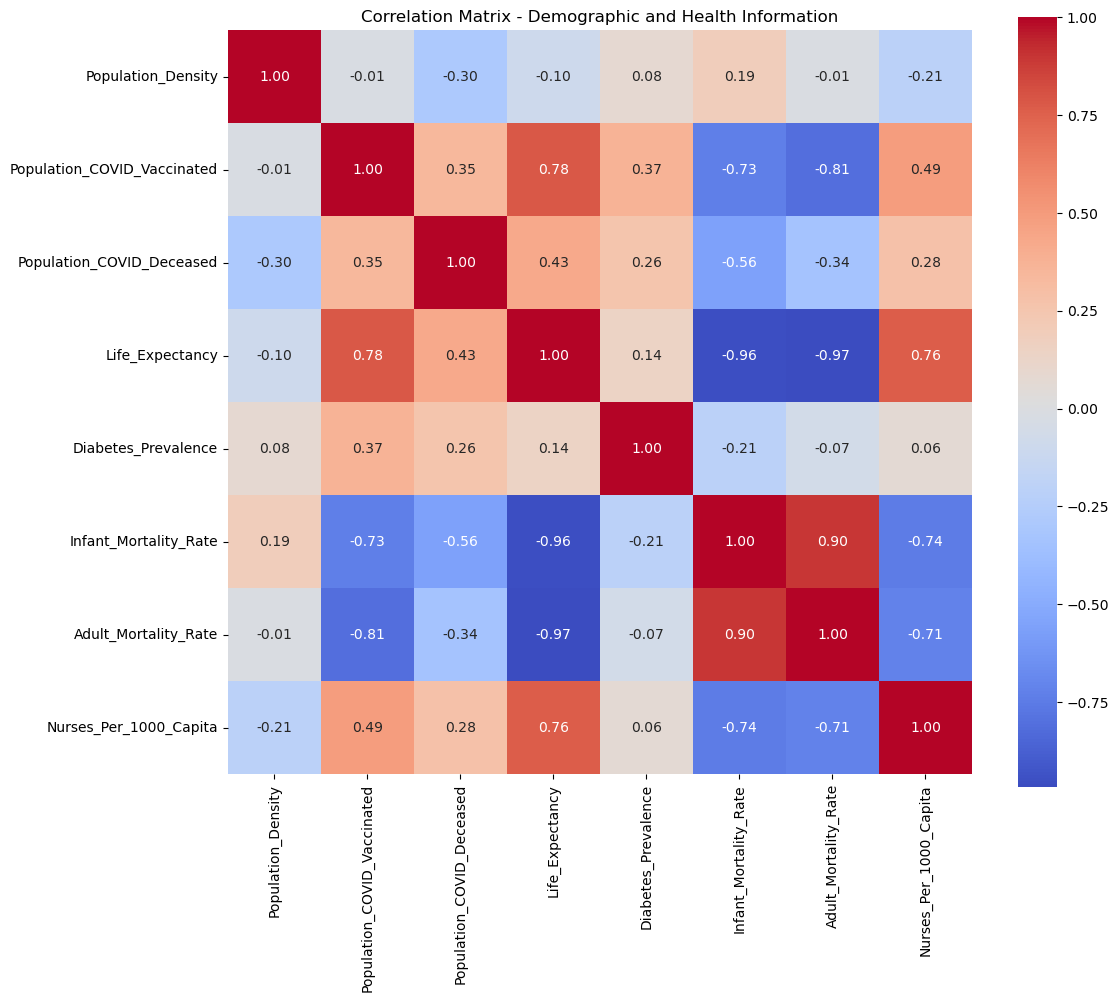

In [ ]:
corr_matrix = result_3_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix - Demographic and Health Information")
plt.savefig("CorrFig.png")
plt.show()